### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [7]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [8]:
# Load the CSV file(s) as reviews.

reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.head())
print(reviews.info())
reviews.describe()

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [9]:
# Any missing values?
reviews.isna().any()

gender                    False
age                       False
remuneration (k£)         False
spending_score (1-100)    False
loyalty_points            False
education                 False
language                  False
platform                  False
product                   False
review                    False
summary                   False
dtype: bool

In [ ]:
# Explore the data.


In [10]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [12]:
# Drop unnecessary columns (language and platform)
del reviews['language']

KeyError: 'language'

In [13]:
del reviews['platform']

In [14]:
# view column names 
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [15]:
# Rename the column headers.

reviews.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace = True)
# View column names.

reviews.columns


Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [16]:
# Create a CSV file as output.
reviews.to_csv('reviews_data.csv', index=False)

In [17]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews_data.csv')

# View DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) spending vs loyalty

In [18]:
# Independent variable.
x = reviews ['spending_score'] 

# Dependent variable.
y = reviews ['loyalty_points'] 

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        13:57:37   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * reviews['spending_score']

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

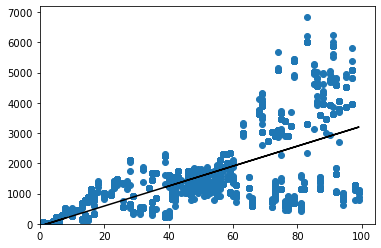

In [21]:
# Plot the graph with a regression line.
plt.scatter(x, y)

#plot the regression line in black 
plt.plot(x, y_pred, color='black')

#set the x and y limits on the axes 
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [22]:
# Independent variable.
x = reviews ['remuneration'] 

# Dependent variable.
y = reviews ['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        13:57:50   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [24]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred2 = (-65.6865) + 34.1878 * reviews['remuneration']

# View the output.
y_pred2

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

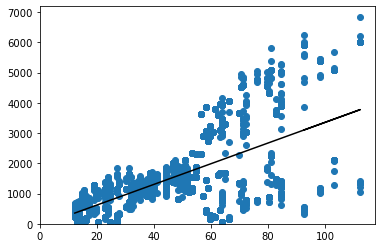

In [25]:
# Plot graph with regression line.
# Plot the graph with a regression line.
plt.scatter(x, y)

#plot the regression line in black 
plt.plot(x, y_pred2, color='black')

#set the x and y limits on the axes 
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [26]:
# Independent variable.
x = reviews ['age'] 

# Dependent variable.

y = reviews ['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 14 Dec 2022   Prob (F-statistic):             0.0577
Time:                        13:58:03   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [28]:
# Set the X coefficient and the constant to generate the regression table.
y_pred3 = (1736.5177)+(-4.0128)*reviews['age']

# View the output.
y_pred3

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

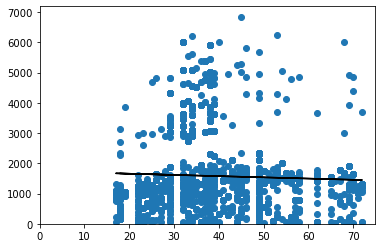

In [57]:
# Plot graph with regression line.
plt.scatter(x, y)

#plot the regression line in black 
plt.plot(x, y_pred3, color='black')

#set the x and y limits on the axes 
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

## 6. Observations and insights

***Your observations here...***






In [ ]:
spending vs. Loyalty 
up to 60 loyalty points shows a positve correlation with spending 

renumeration vs. loyalty 
there is positve correlation between remuneration and loyalty points 

age vs. loyalty 
there is no correlation between age and loyalty points 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [29]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load the CSV file(s) as df2.
reviews = pd.read_csv('reviews_data.csv')

# View DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [33]:
# Drop unnecessary columns.
df2 = reviews.drop(columns=['gender', 'age', 'loyalty_points',
                   'education', 'product', 'review', 'summary'])

# View DataFrame.
df2.info()
df2.columns

#Explore the data 
df2.head()

#Descriptive statistics 
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

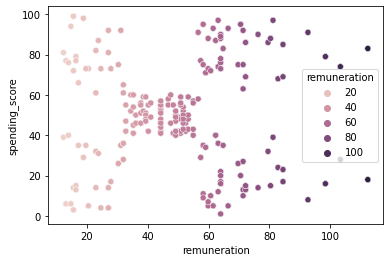

In [34]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2,
                hue='remuneration')

LinAlgError: singular matrix

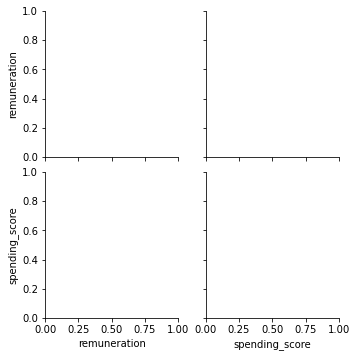

In [35]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             hue='remuneration')

## 3. Elbow and silhoutte methods

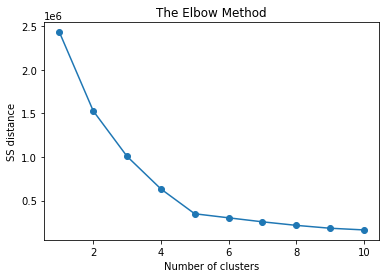

In [36]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

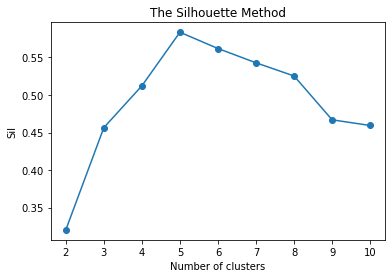

In [77]:
# Determine the number of clusters: Silhouette method.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

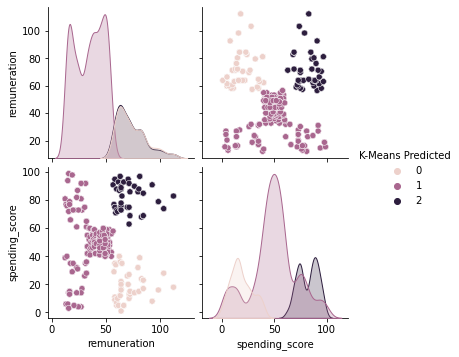

In [37]:
# Using three clusters 
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

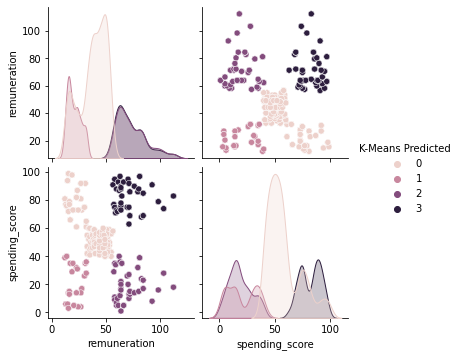

In [38]:
# Using four clusters 

kmeans = KMeans(n_clusters=4,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, 
             hue='K-Means Predicted',
             diag_kind='kde')

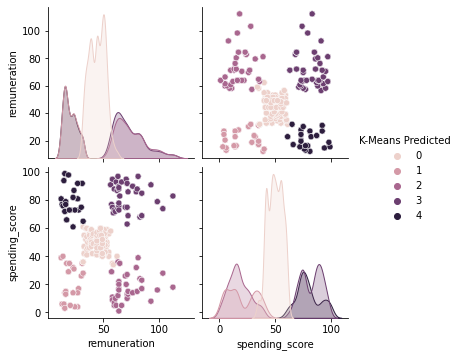

In [39]:
# using five clusters 
kmeans = KMeans(n_clusters=5,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, 
             hue='K-Means Predicted',
             diag_kind='kde')

## 5. Fit final model and justify your choice

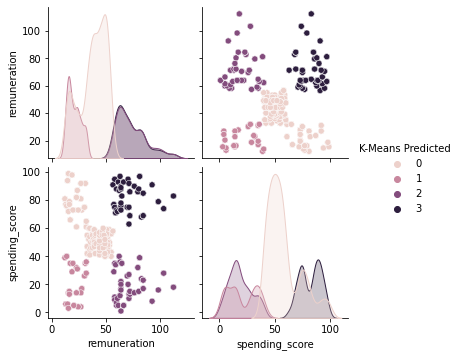

In [40]:
# Apply the final model.
kmeans = KMeans(n_clusters=4,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, 
             hue='K-Means Predicted',
             diag_kind='kde')

In [41]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

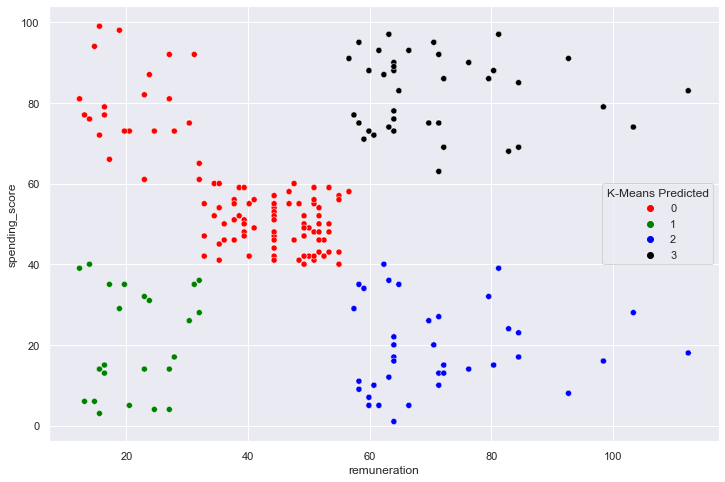

In [42]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

# Visualising the clusters 


## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [113]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [114]:
# Load the data set as df3.
df3 = pd.read_csv('reviews_data.csv')

# View DataFrame.
df3.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [115]:
# Keep necessary columns. Drop unnecessary columns.
df2 = reviews.drop(columns=['gender', 'age', 'loyalty_points',
                   'education', 'product', 'remuneration','spending_score'])

# View DataFrame.
df2.columns

Index(['review', 'summary'], dtype='object')

In [116]:
# Determine if there are any missing values.
df2.isna().any()

review     False
summary    False
dtype: bool

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [117]:
# Review: Change all to lower case and join with a space.
# Transform review data to lowercase.
df2['review'] = df2['review'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))

In [118]:
# Transform summary data to lowercase 
df2['summary']=df2['summary'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))

In [119]:
# Summary: Change all to lower case and join with a space.



# Preview the result.
df2.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [120]:
# Replace all the punctuations in review column.
df2['review'] = df2['review'].str.replace('[^\w\s]','')

# View output.
df2['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [121]:
# Replace all the puncuations in summary column.
df2['summary'] = df2['summary'].str.replace('[^\w\s]','')

# View output.
df2['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [122]:
# Drop duplicates in both columns.
dataframe = df2.drop_duplicates(subset=['review','summary'])

# View DataFrame.
dataframe.reset_index(inplace=True)
dataframe.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [138]:
# Create new DataFrame (copy DataFrame).
dataframecopy = df2.copy()

# View DataFrame.
dataframecopy.columns
dataframecopy.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [128]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beatriceferreira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [139]:
# Apply tokenisation to both columns.
dataframecopy['review_tokens'] = dataframecopy['review'].apply(lambda x: word_tokenize(x))
dataframecopy['summary_tokens'] = dataframecopy['summary'].apply(lambda x: word_tokenize(x))
dataframecopy['tokens'] = dataframecopy['review_tokens'] + dataframecopy['summary_tokens']

# view the dataframe 
dataframecopy['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [140]:
# Define an empty list of tokens.
all_tokens = []

for i in range(dataframecopy.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + dataframecopy['tokens'][i]

In [141]:
# install wordcloud 
!pip install WordCloud

In [142]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [143]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5713, 'and': 3402, 'a': 3401, 'to': 3356, 'of': 2627, 'it': 2240, 'i': 2177, 'game': 2004, 'this': 1911, 'is': 1885, ...})

In [144]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [145]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatriceferreira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


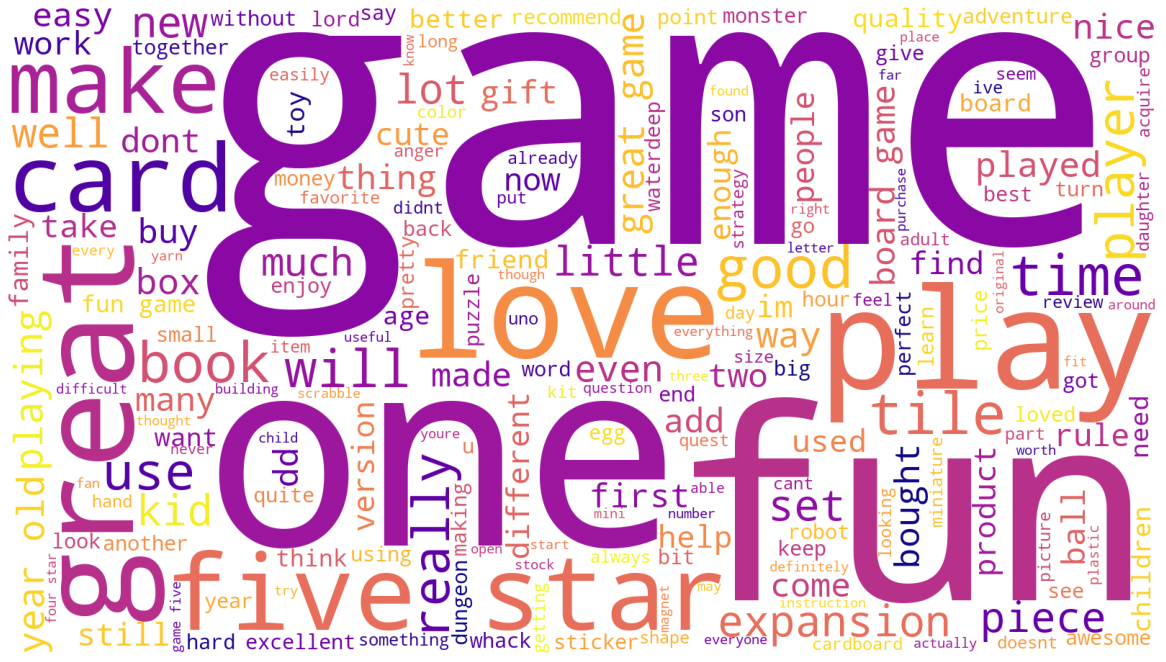

In [146]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [147]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5713, 'and': 3402, 'a': 3401, 'to': 3356, 'of': 2627, 'it': 2240, 'i': 2177, 'game': 2004, 'this': 1911, 'is': 1885, ...})

In [149]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatriceferreira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4d) Identify 15 most common words and polarity

In [150]:
# Determine the 15 most common words.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
the,5713
and,3402
a,3401
to,3356
of,2627
it,2240
i,2177
game,2004
this,1911


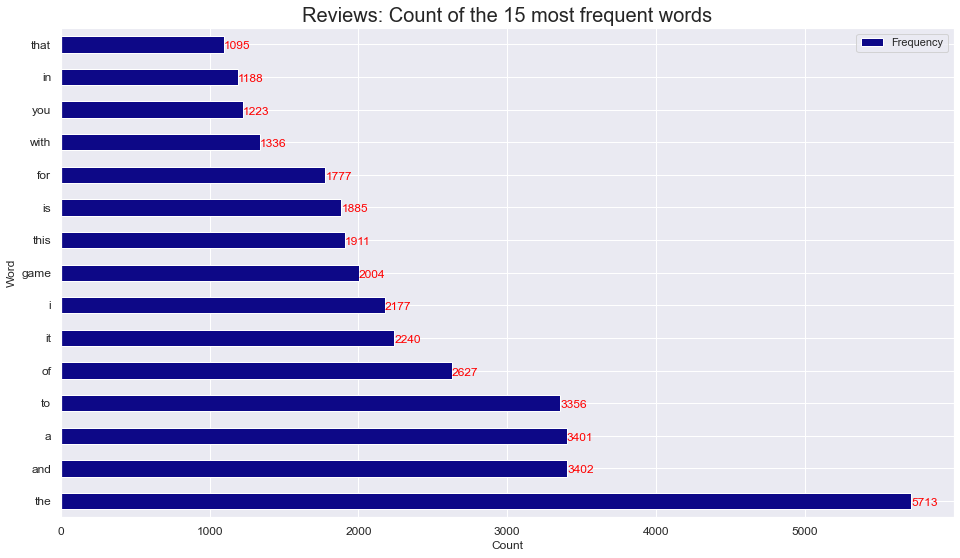

In [152]:
# visualise 

# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [151]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [165]:
# Determine polarity of both columns.
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for review column.
dataframecopy['review'] = dataframecopy['review'].apply(generate_polarity)

# Preview the result.
dataframecopy['review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review, dtype: float64

In [166]:
# Populate a new column with polarity scores for review column.
dataframecopy['summary'] = dataframecopy['summary'].apply(generate_polarity)

# Preview the result.
dataframecopy['summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary, dtype: float64

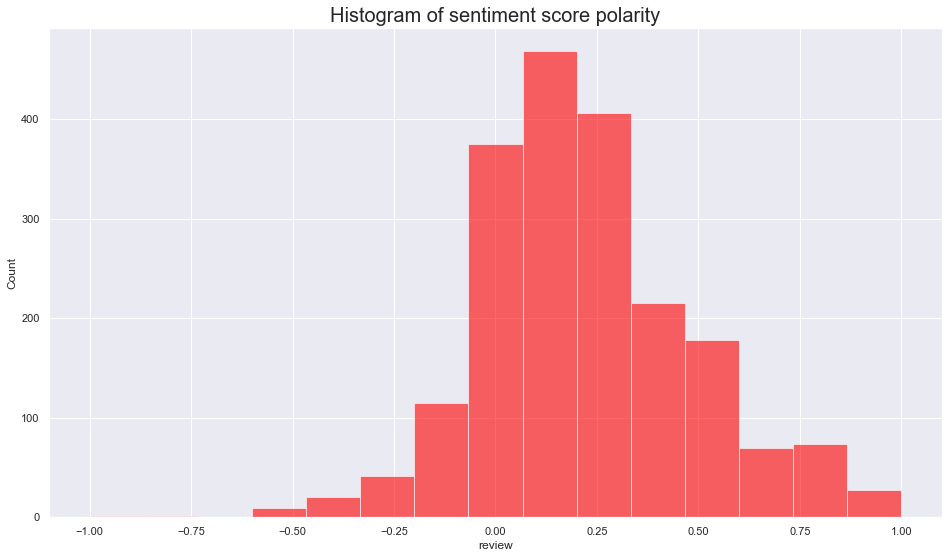

In [169]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(dataframecopy['review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('review', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

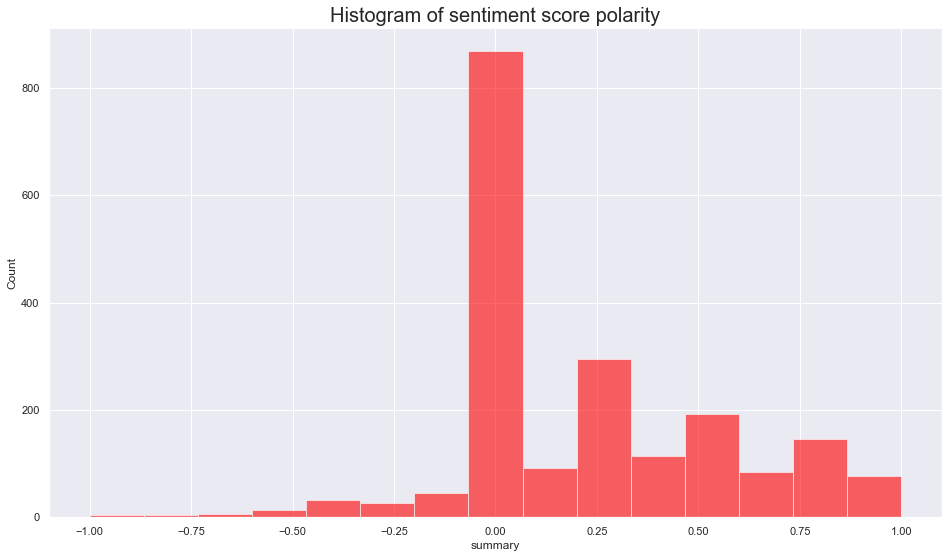

In [170]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity in summary 
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(dataframecopy['summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('summary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [171]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/beatriceferreira/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [181]:
df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in dataframecopy}

In [195]:
# Top 20 negative reviews.
negative_review = dataframecopy.nsmallest(20, 'review')


# View output.
# Adjust the column width.
negative_review.style.set_properties(**{'width': '1200px'})

,review,summary,review_tokens,summary_tokens,tokens
208,-1.000000,-1.000000,"['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not']","['boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am']","['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am']"
182,-0.780000,0.000000,"['incomplete', 'kit', 'very', 'disappointing']","['incomplete', 'kit']","['incomplete', 'kit', 'very', 'disappointing', 'incomplete', 'kit']"
1804,-0.583333,-0.600000,"['im', 'sorry', 'i', 'just', 'find', 'this', 'product', 'to', 'be', 'boring', 'and', 'to', 'be', 'frank', 'juvenile']",['disappointing'],"['im', 'sorry', 'i', 'just', 'find', 'this', 'product', 'to', 'be', 'boring', 'and', 'to', 'be', 'frank', 'juvenile', 'disappointing']"
364,-0.550000,-0.550000,"['one', 'of', 'my', 'staff', 'will', 'be', 'using', 'this', 'game', 'soon', 'so', 'i', 'dont', 'know', 'how', 'well', 'it', 'works', 'as', 'yet', 'but', 'after', 'looking', 'at', 'the', 'cards', 'i', 'believe', 'it', 'will', 'be', 'helpful', 'in', 'getting', 'a', 'conversation', 'started', 'regarding', 'anger', 'and', 'what', 'to', 'do', 'to', 'control', 'it']","['anger', 'control', 'game']","['one', 'of', 'my', 'staff', 'will', 'be', 'using', 'this', 'game', 'soon', 'so', 'i', 'dont', 'know', 'how', 'well', 'it', 'works', 'as', 'yet', 'but', 'after', 'looking', 'at', 'the', 'cards', 'i', 'believe', 'it', 'will', 'be', 'helpful', 'in', 'getting', 'a', 'conversation', 'started', 'regarding', 'anger', 'and', 'what', 'to', 'do', 'to', 'control', 'it', 'anger', 'control', 'game']"
117,-0.500000,0.000000,"['i', 'bought', 'this', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'grandson', 'its', 'a', 'sticker', 'book', 'so', 'how', 'can', 'i', 'go', 'wrong', 'with', 'this', 'gift']",['stickers'],"['i', 'bought', 'this', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'grandson', 'its', 'a', 'sticker', 'book', 'so', 'how', 'can', 'i', 'go', 'wrong', 'with', 'this', 'gift', 'stickers']"
227,-0.500000,0.000000,"['this', 'was', 'a', 'gift', 'for', 'my', 'daughter', 'i', 'found', 'it', 'difficult', 'to', 'use']","['two', 'stars']","['this', 'was', 'a', 'gift', 'for', 'my', 'daughter', 'i', 'found', 'it', 'difficult', 'to', 'use', 'two', 'stars']"
230,-0.500000,0.000000,"['i', 'found', 'the', 'directions', 'difficult']","['three', 'stars']","['i', 'found', 'the', 'directions', 'difficult', 'three', 'stars']"
290,-0.500000,0.000000,"['instructions', 'are', 'complicated', 'to', 'follow']","['two', 'stars']","['instructions', 'are', 'complicated', 'to', 'follow', 'two', 'stars']"
301,-0.500000,0.000000,['difficult'],"['three', 'stars']","['difficult', 'three', 'stars']"
1524,-0.500000,0.000000,"['expensive', 'for', 'what', 'you', 'get']","['two', 'stars']","['expensive', 'for', 'what', 'you', 'get', 'two', 'stars']"


In [196]:
# Top 20 negative summaries.
negative_summary = dataframecopy.nsmallest(20, 'summary')

# View output.
negative_summary.style.set_properties(**{'width': '1200px'})

,review,summary,review_tokens,summary_tokens,tokens
21,0.050000,-1.000000,"['these', 'are', 'cute', 'tatoos', 'for', 'those', 'who', 'love', 'pirates', 'however', 'the', 'retail', 'price', 'is', '150', 'and', 'amazons', 'price', 'is', 'more', 'than', 'double', 'i', 'have', 'never', 'paid', 'over', 'the', 'retail', 'price', 'for', 'an', 'item', 'at', 'amazon', 'i', 'was', 'shocked', 'there', 'are', 'only', 'a', 'handful', 'of', 'tatoos', 'and', 'for', '150', 'i', 'wouldnt', 'mind', 'but', 'to', 'charge', '350', 'for', 'an', 'item', 'that', 'sells', 'anywhere', 'else', 'for', '150', 'is', 'criminal', 'find', 'it', 'at', 'a', 'local', 'drugstore', 'and', 'save', 'your']","['the', 'worst', 'value', 'ive', 'ever', 'seen']","['these', 'are', 'cute', 'tatoos', 'for', 'those', 'who', 'love', 'pirates', 'however', 'the', 'retail', 'price', 'is', '150', 'and', 'amazons', 'price', 'is', 'more', 'than', 'double', 'i', 'have', 'never', 'paid', 'over', 'the', 'retail', 'price', 'for', 'an', 'item', 'at', 'amazon', 'i', 'was', 'shocked', 'there', 'are', 'only', 'a', 'handful', 'of', 'tatoos', 'and', 'for', '150', 'i', 'wouldnt', 'mind', 'but', 'to', 'charge', '350', 'for', 'an', 'item', 'that', 'sells', 'anywhere', 'else', 'for', '150', 'is', 'criminal', 'find', 'it', 'at', 'a', 'local', 'drugstore', 'and', 'save', 'your', 'the', 'worst', 'value', 'ive', 'ever', 'seen']"
208,-1.000000,-1.000000,"['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not']","['boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am']","['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am']"
829,0.156399,-1.000000,"['ive', 'discovered', 'that', 'im', 'really', 'new', 'school', 'when', 'it', 'comes', 'to', 'my', 'board', 'games', 'except', 'for', 'boggle', 'and', 'a', 'couple', 'chess', 'boards', 'and', 'a', 'novelty', 'version', 'of', 'yahtzee', 'this', 'is', 'the', 'oldest', 'game', 'i', 'own', 'by', 'more', 'than', '30', 'years', 'its', 'very', 'watered', 'down', 'for', 'my', 'usual', 'tastes', 'gameplay', 'consists', 'of', 'playing', 'tiles', 'on', 'a', 'board', 'to', 'start', 'expand', 'or', 'merge', 'hotel', 'chains', 'then', 'you', 'buy', 'stocks', 'trying', 'to', 'predict', 'which', 'ones', 'will', 'grow', 'so', 'you', 'can', 'buy', 'as', 'low', 'as', 'possible', 'and', 'sell', 'them', 'for', 'huge', 'profits', 'by', 'the', 'end', 'of', 'the', 'game', 'the', 'player', 'with', 'the', 'most', 'money', 'at', 'the', 'end', 'wins', 'i', 'think', 'this', 'game', 'is', 'certainly', 'better', 'with', 'more', 'people', 'it', 'can', 'accommodate', 'up', 'to', '6', 'and', 'that', 'may', 'be', 'too', 'many', 'ive', 'never', 'played', 'with', 'that', 'number', 'but', 'with', '3', 'or', 'fewer', 'it', 'is', 'too', 'easy', 'to', 'run', 'away', 'with', 'the', 'game', 'more', 'players', 'offers', 'more', 'competition', 'and', 'gaps', 'between', 'your', 'turns', 'and', 'dilutes', 'the', 'available', 'stock', 'with', 'three', 'you', 'can', 'see', 'what', 'tiles', 'you', 'have', 'available', 'and', 'buy', 'up', 'huge', 'amounts', 'of', 'stock', 'early', 'before', 'other', 'players', 'have', 'time', 'to', 'react', 'and', 'attempt', 'to', 'thwart', 'your', 'plan', 'or', 'prevent', 'you', 'from', 'a', 'big', 'payout', 'ive', 'enjoyed', 'power', 'grid', 'and', 'have', 'intended', 'on', 'playing', 'a', 'deeper', 'economic', 'game', 'for', 'some', 'time', 'but', 'this', 'certainly', 'isnt', 'it', 'this', 'is', 'much', 'more', 'shallow', 'an', 'experience', 'although', 'it', 'does', 'play', 'reasonably', 'quickly', 'and', 'may', 'fil

In [197]:
# Top 20 positive reviews.
positive_review = dataframecopy.nlargest(20, 'review')

# View output.
negative_review.style.set_properties(**{'width': '1200px'})

,review,summary,review_tokens,summary_tokens,tokens
208,-1.000000,-1.000000,"['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not']","['boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am']","['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am']"
182,-0.780000,0.000000,"['incomplete', 'kit', 'very', 'disappointing']","['incomplete', 'kit']","['incomplete', 'kit', 'very', 'disappointing', 'incomplete', 'kit']"
1804,-0.583333,-0.600000,"['im', 'sorry', 'i', 'just', 'find', 'this', 'product', 'to', 'be', 'boring', 'and', 'to', 'be', 'frank', 'juvenile']",['disappointing'],"['im', 'sorry', 'i', 'just', 'find', 'this', 'product', 'to', 'be', 'boring', 'and', 'to', 'be', 'frank', 'juvenile', 'disappointing']"
364,-0.550000,-0.550000,"['one', 'of', 'my', 'staff', 'will', 'be', 'using', 'this', 'game', 'soon', 'so', 'i', 'dont', 'know', 'how', 'well', 'it', 'works', 'as', 'yet', 'but', 'after', 'looking', 'at', 'the', 'cards', 'i', 'believe', 'it', 'will', 'be', 'helpful', 'in', 'getting', 'a', 'conversation', 'started', 'regarding', 'anger', 'and', 'what', 'to', 'do', 'to', 'control', 'it']","['anger', 'control', 'game']","['one', 'of', 'my', 'staff', 'will', 'be', 'using', 'this', 'game', 'soon', 'so', 'i', 'dont', 'know', 'how', 'well', 'it', 'works', 'as', 'yet', 'but', 'after', 'looking', 'at', 'the', 'cards', 'i', 'believe', 'it', 'will', 'be', 'helpful', 'in', 'getting', 'a', 'conversation', 'started', 'regarding', 'anger', 'and', 'what', 'to', 'do', 'to', 'control', 'it', 'anger', 'control', 'game']"
117,-0.500000,0.000000,"['i', 'bought', 'this', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'grandson', 'its', 'a', 'sticker', 'book', 'so', 'how', 'can', 'i', 'go', 'wrong', 'with', 'this', 'gift']",['stickers'],"['i', 'bought', 'this', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'grandson', 'its', 'a', 'sticker', 'book', 'so', 'how', 'can', 'i', 'go', 'wrong', 'with', 'this', 'gift', 'stickers']"
227,-0.500000,0.000000,"['this', 'was', 'a', 'gift', 'for', 'my', 'daughter', 'i', 'found', 'it', 'difficult', 'to', 'use']","['two', 'stars']","['this', 'was', 'a', 'gift', 'for', 'my', 'daughter', 'i', 'found', 'it', 'difficult', 'to', 'use', 'two', 'stars']"
230,-0.500000,0.000000,"['i', 'found', 'the', 'directions', 'difficult']","['three', 'stars']","['i', 'found', 'the', 'directions', 'difficult', 'three', 'stars']"
290,-0.500000,0.000000,"['instructions', 'are', 'complicated', 'to', 'follow']","['two', 'stars']","['instructions', 'are', 'complicated', 'to', 'follow', 'two', 'stars']"
301,-0.500000,0.000000,['difficult'],"['three', 'stars']","['difficult', 'three', 'stars']"
1524,-0.500000,0.000000,"['expensive', 'for', 'what', 'you', 'get']","['two', 'stars']","['expensive', 'for', 'what', 'you', 'get', 'two', 'stars']"


In [200]:
# Top 20 positive summaries.
positive_summary = dataframecopy.nlargest(20, 'summary')

# eliminate unnecessary columns 
positive_summary = positive_summary[['summary_tokens', 'summary']]

# View output.
positive_summary.style.set_properties(**{'width': '1200px'})

,summary_tokens,summary
6,"['best', 'gm', 'screen', 'ever']",1.000000
28,"['wonderful', 'designs']",1.000000
32,['perfect'],1.000000
80,"['theyre', 'the', 'perfect', 'size', 'to', 'keep', 'in', 'the', 'car', 'or', 'a', 'diaper']",1.000000
134,"['perfect', 'for', 'preschooler']",1.000000
140,"['awesome', 'sticker', 'activity', 'for', 'the', 'price']",1.000000
161,"['awesome', 'book']",1.000000
163,"['he', 'was', 'very', 'happy', 'with', 'his', 'gift']",1.000000
187,['awesome'],1.000000
210,"['awesome', 'and', 'welldesigned', 'for', '9', 'year', 'olds']",1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

# 